In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import googletrans
import time
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../../Data/data_train_nostemstop_preprocessed.csv",sep=";",encoding="latin-1").append(pd.read_csv("../../Data/data_val_nostemstop_preprocessed.csv",sep=";",encoding="latin-1")).append(pd.read_csv("../../Data/data_test_nostemstop_preprocessed.csv",sep=";",encoding="latin-1"))
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,- kdg will be kind enough to show you how to l...,0,1,0,0,0,0,0,0,0,0,0,0,kadang will be kind enough to show you how to...
1,Ternyata komunis juga bisa nangis',0,0,0,0,0,0,0,0,0,0,0,0,ternyata komunis juga bisa menangis
2,USER USER Kenapa harus bom ya? Kek yg benar nu...,0,0,0,0,0,0,0,0,0,0,0,0,user user kenapa harus bom seperti benar men...
3,USER Sumpaaah kaya kalo abis IAA dilanjut olim...,0,0,0,0,0,0,0,0,0,0,0,0,user sumpah kaya kalau habis iya dilanjut olim...
4,RT USER USER USER USER USER fungsi media sosia...,1,0,1,0,0,0,0,0,1,1,0,0,rt user user user user user fungsi media sosia...


In [3]:
data_trans = pd.read_csv("../../Data/data_train_trans_nostemstop_preprocessed.csv",sep=";",encoding="latin-1").append(pd.read_csv("../../Data/data_val_trans_nostemstop_preprocessed.csv",sep=";",encoding="latin-1")).append(pd.read_csv("../../Data/data_test_trans_nostemstop_preprocessed.csv",sep=";",encoding="latin-1"))
data_trans.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,- kdg will be kind enough to show you how to l...,0,1,0,0,0,0,0,0,0,0,0,0,kadang akan cukup baik untuk menunjukkan anda ...
1,Ternyata komunis juga bisa nangis',0,0,0,0,0,0,0,0,0,0,0,0,ternyata komunis also can menangis
2,USER USER Kenapa harus bom ya? Kek yg benar nu...,0,0,0,0,0,0,0,0,0,0,0,0,pengguna pengguna kenapa harus bom seperti b...
3,USER Sumpaaah kaya kalo abis IAA dilanjut olim...,0,0,0,0,0,0,0,0,0,0,0,0,pengguna sumpah kaya kalau habis iya dilanjut ...
4,RT USER USER USER USER USER fungsi media sosia...,1,0,1,0,0,0,0,0,1,1,0,0,media fungsi fungsi rt pengguna pengguna pengg...


In [4]:
data.shape

(18396, 14)

In [5]:
data_trans.shape

(18396, 14)

## Data Analysis

### Distribusi Panjang Karakter Tweet

In [6]:
data_anl = data[["Tweet_Parsed"]].copy()
data_anl_trans = data_trans[["Tweet_Parsed"]].copy()

In [7]:
data_anl['Tweet_length'] = data_anl['Tweet_Parsed'].str.len()
data_anl_trans['Tweet_length'] = data_anl_trans['Tweet_Parsed'].str.len()

Text(0.5, 0, '')

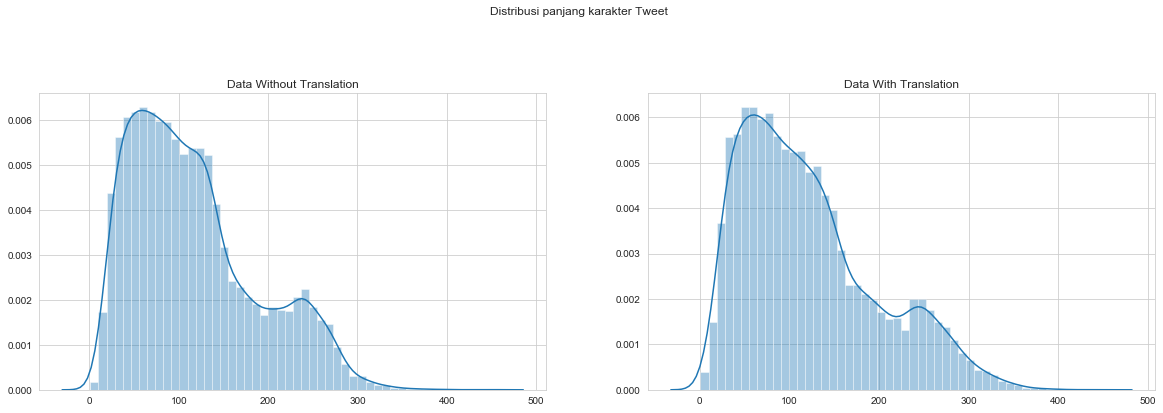

In [8]:
plt.figure(figsize=(20,12))
plt.suptitle('Distribusi panjang karakter Tweet')

plt.subplot(2,2,1)
sns.distplot(data_anl['Tweet_length'])
plt.title("Data Without Translation")
plt.xlabel("")

plt.subplot(2,2,2)
sns.distplot(data_anl_trans['Tweet_length'])
plt.title("Data With Translation")
plt.xlabel("")

In [9]:
data_anl['Tweet_length'].describe()

count    18396.000000
mean       116.463905
std         70.951664
min          1.000000
25%         60.000000
50%        102.000000
75%        156.000000
max        454.000000
Name: Tweet_length, dtype: float64

In [10]:
data_anl_trans['Tweet_length'].describe()

count    18396.000000
mean       121.259513
std         75.590308
min          1.000000
25%         62.000000
50%        106.000000
75%        162.000000
max        449.000000
Name: Tweet_length, dtype: float64

### Distribusi Panjang Kata Tweet

In [11]:
data_anl['word_count'] = data_anl['Tweet_Parsed'].apply(lambda x: len(str(x).split()))
data_anl_trans['word_count'] = data_anl_trans['Tweet_Parsed'].apply(lambda x: len(str(x).split()))

Text(0.5, 0, '')

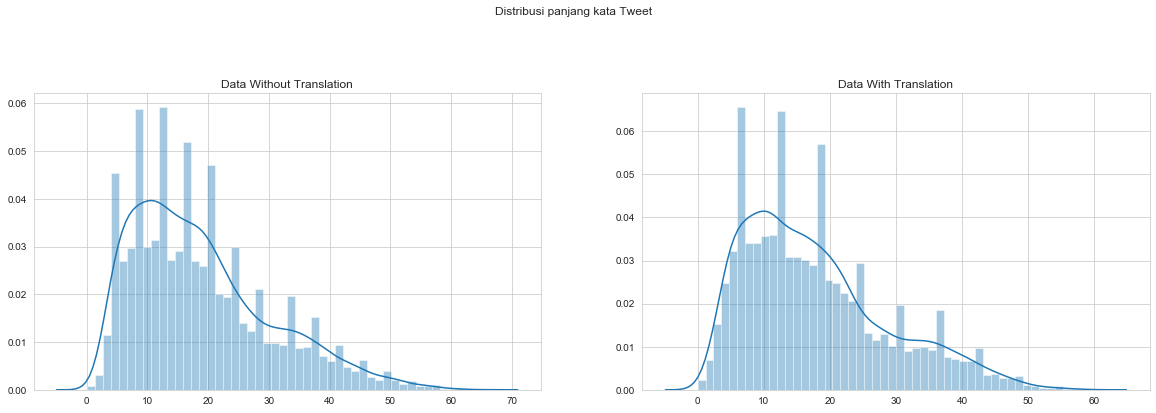

In [12]:
plt.figure(figsize=(20,12))
plt.suptitle('Distribusi panjang kata Tweet')

plt.subplot(2,2,1)
sns.distplot(data_anl['word_count'])
plt.title("Data Without Translation")
plt.xlabel("")

plt.subplot(2,2,2)
sns.distplot(data_anl_trans['word_count'])
plt.title("Data With Translation")
plt.xlabel("")

In [13]:
data_anl['word_count'].describe()

count    18396.000000
mean        18.781474
std         11.391855
min          0.000000
25%         10.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: word_count, dtype: float64

In [14]:
data_anl_trans['word_count'].describe()

count    18396.000000
mean        17.832735
std         10.945257
min          0.000000
25%          9.000000
50%         16.000000
75%         24.000000
max         60.000000
Name: word_count, dtype: float64

### Sampel Tweet

In [15]:
data['Tweet_Parsed'].iloc[18000]

'tiruan dulu dia nih captain paling najis liverpool power rupanya keep up the good performance user '

In [16]:
data_trans['Tweet_Parsed'].iloc[18000]

'tiruan dulu dia kekuatan liverpool kapten nih pagar najis rupanya menjaga pengguna kinerja  baik'

### Top 20 Words

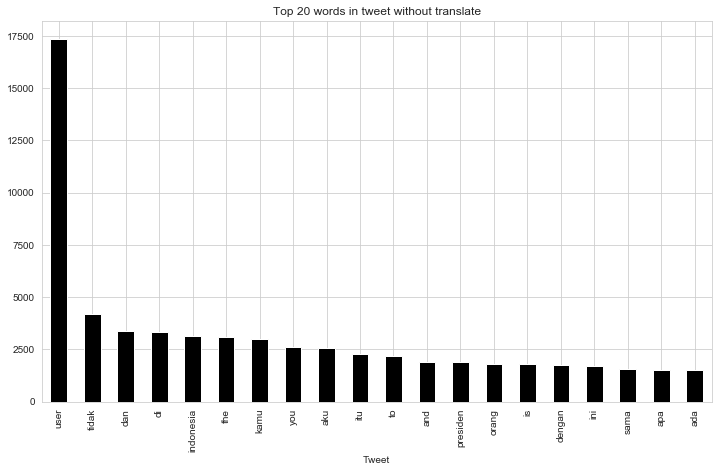

In [17]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data_anl['Tweet_Parsed'], 20)
# for word, freq in common_words:
#     print(word, freq)
topWord = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
topWord.groupby('Tweet').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 words in tweet without translate', figsize=(12,7))


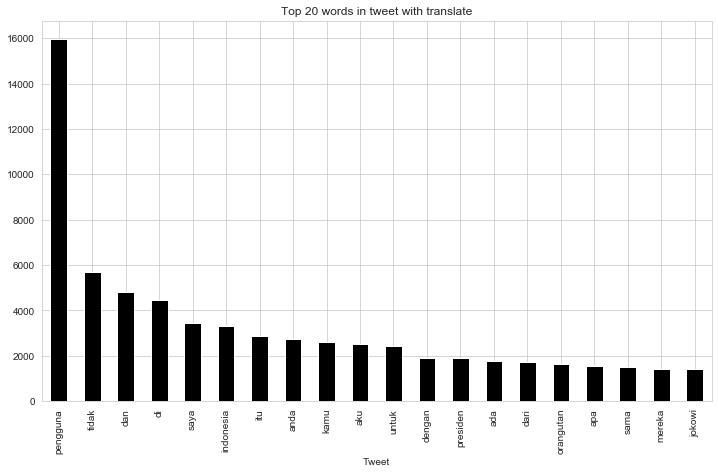

In [18]:
common_words = get_top_n_words(data_anl_trans['Tweet_Parsed'], 20)
# for word, freq in common_words:
#     print(word, freq)
topWord = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
topWord.groupby('Tweet').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 words in tweet with translate', figsize=(12,7))


### Top 20 Bigram

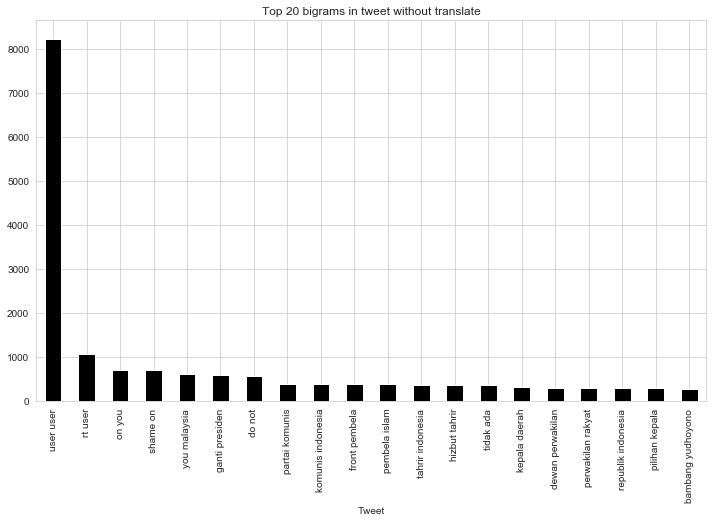

In [19]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data_anl['Tweet_Parsed'], 20)
# for word, freq in common_words:
#     print(word, freq)
topbigram = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
topbigram.groupby('Tweet').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 bigrams in tweet without translate', figsize=(12,7))


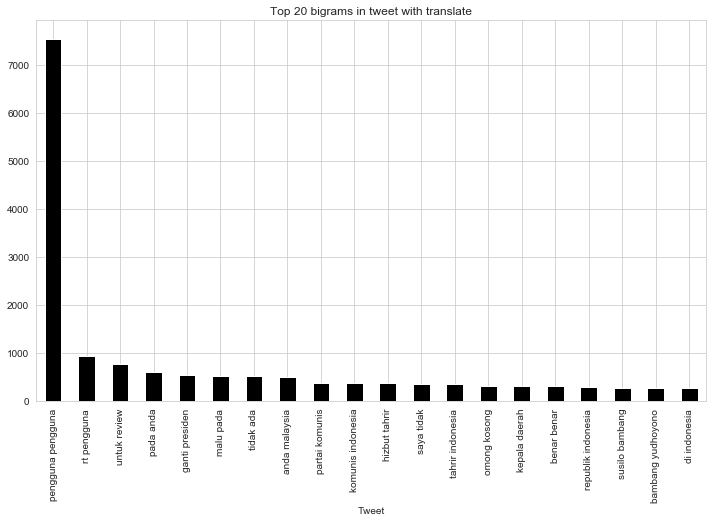

In [20]:
common_words = get_top_n_bigram(data_anl_trans['Tweet_Parsed'], 20)
# for word, freq in common_words:
#     print(word, freq)
topbigram = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
topbigram.groupby('Tweet').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 bigrams in tweet with translate', figsize=(12,7))


### Language of Tweet

- **Without Translate**

In [21]:
lang_count = {}
for i in tqdm(data_anl['Tweet_Parsed']):
    translator = googletrans.Translator()
    lang = translator.translate(i).src
    lang_amount = 1
    if lang not in lang_count.keys():
        lang_count[lang] = lang_amount
    else:
        lang_count[lang] = lang_count[lang]+lang_amount
    time.sleep(2)

100%|█████████████████████████████████████████████████████████████████████████| 18396/18396 [12:01:20<00:00,  2.37s/it]


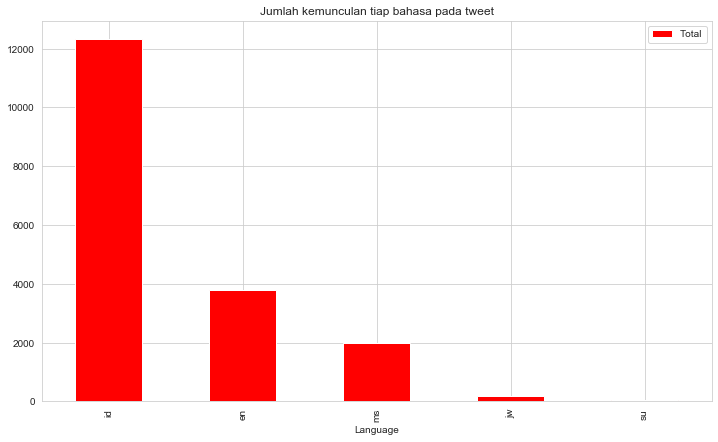

In [22]:
pd.DataFrame(data=lang_count.items(), columns = ["Language", "Total"]).set_index(['Language']).sort_values(["Total"],ascending=False).head(5).plot(
    kind="bar", title="Jumlah kemunculan tiap bahasa pada tweet", color="red", figsize=(12,7))

In [23]:
pd.DataFrame(data=lang_count.items(), columns = ["Language", "Total"]).set_index(['Language']).sort_values(["Total"],ascending=False)

,Total
Language,
id,12334
en,3780
ms,1991
jw,195
su,42
pt,9
hi,6
ar,6
fi,4


In [24]:
import pickle

with open('lang_count_nostemstop.pkl', 'wb') as f:
  pickle.dump(lang_count, f)